In [6]:
#ライブラリのインポート
import pandas as pd
import seaborn as sns
import yfinance as yf

#データの準備
df = yf.download("MSFT", start="2020-01-01", end="2025-10-25")
df

/tmp/ipython-input-1052897514.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("MSFT", start="2020-01-01", end="2025-10-25")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2020-01-02,152.791153,152.895792,150.612777,151.040841,22622100
2020-01-03,150.888580,152.153756,150.355878,150.603214,21116200
2020-01-06,151.278610,151.345205,148.881435,149.423659,20813700
2020-01-07,149.899261,151.887388,149.651940,151.554456,21634100
2020-01-08,152.286942,152.962341,150.251249,151.183478,27746500
...,...,...,...,...,...
2025-10-20,516.789978,518.700012,513.429993,514.609985,14665600
2025-10-21,517.659973,518.690002,513.039978,517.500000,15586200


In [7]:
#カラム名を確認
print(df.columns)


#namesの意味

MultiIndex([( 'Close', 'MSFT'),
            (  'High', 'MSFT'),
            (   'Low', 'MSFT'),
            (  'Open', 'MSFT'),
            ('Volume', 'MSFT')],
           names=['Price', 'Ticker'])


In [8]:
#振り直し
df = df.reset_index()
df = df.rename(columns={'Date': 'ds'})
df

Price,ds,Close,High,Low,Open,Volume
Ticker,,MSFT,MSFT,MSFT,MSFT,MSFT
0,2020-01-02,152.791153,152.895792,150.612777,151.040841,22622100
1,2020-01-03,150.888580,152.153756,150.355878,150.603214,21116200
2,2020-01-06,151.278610,151.345205,148.881435,149.423659,20813700
3,2020-01-07,149.899261,151.887388,149.651940,151.554456,21634100
4,2020-01-08,152.286942,152.962341,150.251249,151.183478,27746500
...,...,...,...,...,...,...
1457,2025-10-20,516.789978,518.700012,513.429993,514.609985,14665600
1458,2025-10-21,517.659973,518.690002,513.039978,517.500000,15586200
1459,2025-10-22,520.539978,525.229980,517.710022,521.150024,18962700


<Axes: xlabel='ds', ylabel='MSFT'>

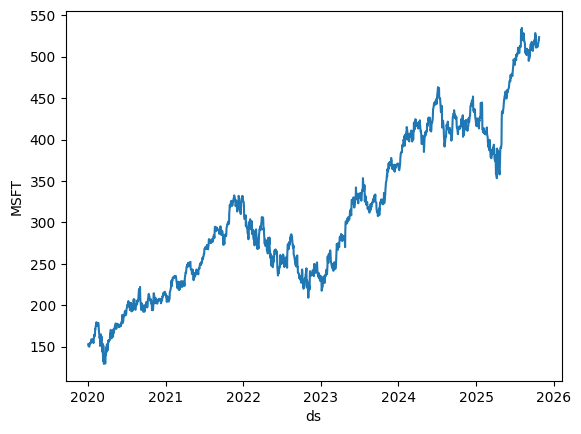

In [9]:
#x・yパラメータには、それぞれの軸に設定する配列を指定
#xパラメータに、to_datetime関数で変換した日付データを指定
time = pd.to_datetime(df['ds'])
sns.lineplot(x=df['ds'], y=df['Close'].squeeze())

In [10]:
#取り込んだデータにおける欠損の有無
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (ds, )          1462 non-null   datetime64[ns]
 1   (Close, MSFT)   1462 non-null   float64       
 2   (High, MSFT)    1462 non-null   float64       
 3   (Low, MSFT)     1462 non-null   float64       
 4   (Open, MSFT)    1462 non-null   float64       
 5   (Volume, MSFT)  1462 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 68.7 KB


In [17]:
# 日付を datetime に変換
df['ds'] = pd.to_datetime(df['ds'])

# Close 列を y にリネーム
df = df.rename(columns={'Close': 'y'})

#絞り込み
df.columns = ['ds','y']
df.head()

,ds,y
0,2020-01-02,152.791153
1,2020-01-03,150.888580
2,2020-01-06,151.278610
3,2020-01-07,149.899261
4,2020-01-08,152.286942


In [18]:
#予測モデルの学習
#Prophetクラスをインポートし、インスタンス化
from prophet import Prophet
model = Prophet()

In [19]:
#df（過去の時系列データ）を引数に指定して、fitメソッドを実行
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
#ここから予測
#予測期間：2024/10/25〜2025/10/24
future = model.make_future_dataframe(periods=24, freq='MS')
future

,ds
0,2020-01-02
1,2020-01-03
2,2020-01-06
3,2020-01-07
4,2020-01-08
...,...
1481,2027-06-01
1482,2027-07-01
1483,2027-08-01
1484,2027-09-01


In [32]:
#predictメソッドで予測
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,166.507098,146.013633,181.291040,166.507098,166.507098,-3.094071,-3.094071,-3.094071,3.223265,3.223265,3.223265,-6.317336,-6.317336,-6.317336,0.0,0.0,0.0,163.413026
1,2020-01-03,166.571763,144.698520,181.346428,166.571763,166.571763,-3.891469,-3.891469,-3.891469,3.324346,3.324346,3.324346,-7.215815,-7.215815,-7.215815,0.0,0.0,0.0,162.680294
2,2020-01-06,166.765759,141.459513,176.791487,166.765759,166.765759,-6.527465,-6.527465,-6.527465,3.155461,3.155461,3.155461,-9.682926,-9.682926,-9.682926,0.0,0.0,0.0,160.238293
3,2020-01-07,166.830424,142.088847,177.634267,166.830424,166.830424,-7.539052,-7.539052,-7.539052,2.861863,2.861863,2.861863,-10.400915,-10.400915,-10.400915,0.0,0.0,0.0,159.291371
4,2020-01-08,166.895089,140.838028,177.537853,166.895089,166.895089,-7.719686,-7.719686,-7.719686,3.333920,3.333920,3.333920,-11.053606,-11.053606,-11.053606,0.0,0.0,0.0,159.175403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,2027-06-01,637.451615,344.908072,926.844948,342.379483,927.738525,-0.162875,-0.162875,-0.162875,2.861863,2.861863,2.861863,-3.024738,-3.024738,-3.024738,0.0,0.0,0.0,637.288740
1482,2027-07-01,644.780751,344.639095,985.249361,322.860078,962.403031,19.644539,19.644539,19.644539,3.223265,3.223265,3.223265,16.421274,16.421274,16.421274,0.0,0.0,0.0,664.425290
1483,2027-08-01,652.354192,321.403420,1014.170776,308.218093,997.533693,10.772684,10.772684,10.772684,-7.949428,-7.949428,-7.949428,18.722112,18.722112,18.722112,0.0,0.0,0.0,663.126876
1484,2027-09-01,659.927633,315.192572,1049.454888,293.383438,1032.220646,20.921168,20.921168,20.921168,3.333920,3.333920,3.333920,17.587248,17.587248,17.587248,0.0,0.0,0.0,680.848800


In [33]:
#関連する項目を抽出
#日付、旅客数の予測値、不確実性区間を表示
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-02,163.413026,146.013633,181.291040
1,2020-01-03,162.680294,144.698520,181.346428
2,2020-01-06,160.238293,141.459513,176.791487
3,2020-01-07,159.291371,142.088847,177.634267
4,2020-01-08,159.175403,140.838028,177.537853
...,...,...,...,...
1481,2027-06-01,637.288740,344.908072,926.844948
1482,2027-07-01,664.425290,344.639095,985.249361
1483,2027-08-01,663.126876,321.403420,1014.170776
1484,2027-09-01,680.848800,315.192572,1049.454888


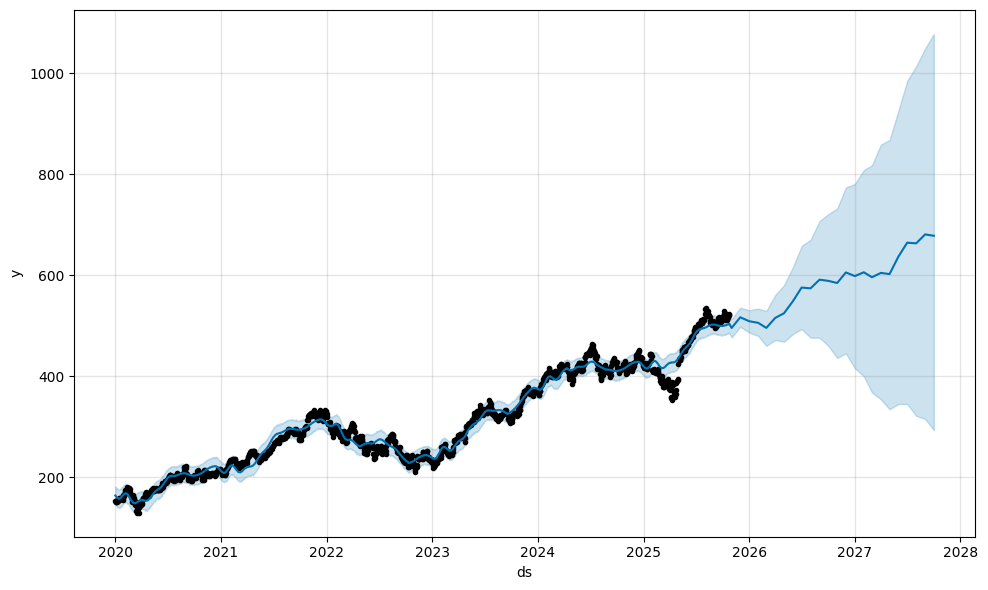

In [34]:
#グラフ上に可視化
fig_forecast = model.plot(forecast)

In [38]:
#予測の評価

#過去のデータを使って、複数パターンのテストを実施
#cutoffsとhorizonという2つのパラメータで調整可能
cutoffs = pd.to_datetime(['2021-12-01', '2022-12-01', '2023-12-01', '2024-12-01'])

In [45]:
#テストパターンを作成するcross_validation関数をインポート
from prophet.diagnostics import cross_validation

#cross_validation関数を実行して、1年後を作成
df_cv = cross_validation(model, horizon = '180 days', cutoffs=cutoffs)

  0%|          | 0/4 [00:00<?, ?it/s]

In [46]:
#2024年12月以降のデータが格納されているか確認
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-12-02,325.465241,319.138610,331.294375,319.405609,2021-12-01
1,2021-12-03,326.045459,319.871716,332.226538,313.123871,2021-12-01
2,2021-12-06,327.343054,321.273734,333.480335,316.206573,2021-12-01
3,2021-12-07,328.064317,321.819046,334.126042,324.669434,2021-12-01
4,2021-12-08,329.177277,322.428794,335.654974,324.717896,2021-12-01
...,...,...,...,...,...,...
485,2025-05-23,477.988658,440.624843,512.125718,449.441162,2024-12-01
486,2025-05-27,478.897388,441.679729,516.211299,459.933899,2024-12-01
487,2025-05-28,479.505339,442.022327,517.089724,456.609375,2024-12-01
488,2025-05-29,479.579796,441.570694,518.962775,457.927216,2024-12-01


In [47]:
#評価指標を算出するperformance_metrics関数をインポート
from prophet.diagnostics import performance_metrics

#performance_metrics関数を実行
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,18 days,156.279377,12.501175,10.499253,0.034198,0.024458,0.034766,0.578231
1,19 days,171.662775,13.102014,10.810089,0.035285,0.024458,0.035757,0.571429
2,20 days,186.910237,13.671512,11.388324,0.037399,0.024937,0.037826,0.537415
3,21 days,191.234219,13.828746,11.507012,0.037797,0.026344,0.038156,0.540816
4,22 days,196.263283,14.009400,11.640338,0.038272,0.028510,0.038590,0.551020


In [48]:
#monthlyパラメータにTrueを指定して、horizon列を月単位で表示?
df_p = performance_metrics(df_cv, monthly=True)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,0,169.503877,13.019365,10.901133,0.035390,0.026344,0.035599,0.555556
1,1,1319.248333,36.321458,29.380407,0.096151,0.076028,0.093199,0.222222
2,2,3904.126981,62.483014,54.802801,0.177339,0.150767,0.167587,0.038961
3,3,6035.656651,77.689489,71.687938,0.234756,0.245372,0.229380,0.011494
4,4,9963.979046,99.819733,85.986642,0.281341,0.317460,0.263493,0.256098


<Axes: xlabel='horizon', ylabel='mse'>

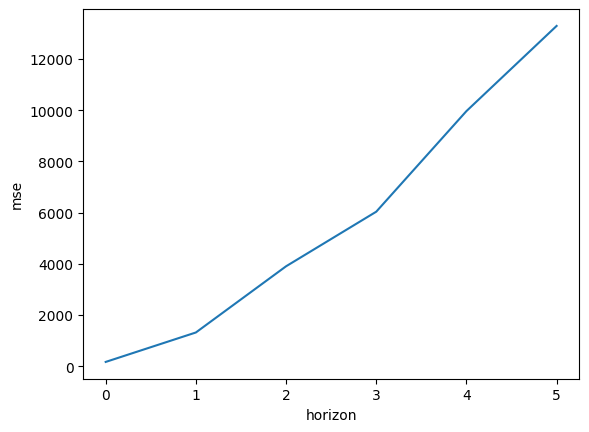

In [49]:
#seabornのlineplot関数を活用して、mseの推移を可視化
sns.lineplot(x='horizon', y='mse', data=df_p)

<Axes: xlabel='horizon', ylabel='coverage'>

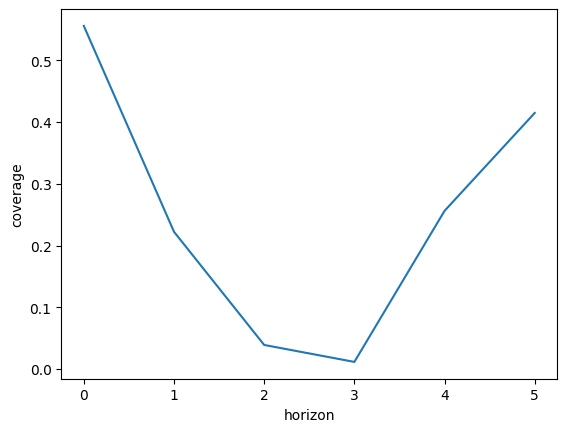

In [50]:
#coverageも、推移を可視化
sns.lineplot(x='horizon', y='coverage', data=df_p)